In [1]:

import os,sys
import numpy as np
import matplotlib.pyplot as plt
import zray 
import gpoloidal
import gpoloidal.plot_utils as plot_utils
import gpoloidal.rt1 as rt1

plot_utils.journal_mode()

In [2]:
rt1kernel = rt1.Kernel2D_scatter_rt1()

load vessel from C:\Users\ueda\github_project\GPoloidal\src\gpoloidal\rt1\rt1_simple_frame.json
you have to "create_induced_point()" or "load_point()" in advance!



fill_start_point is None, so use (0.5445500000030501, 0.002483005624657039)


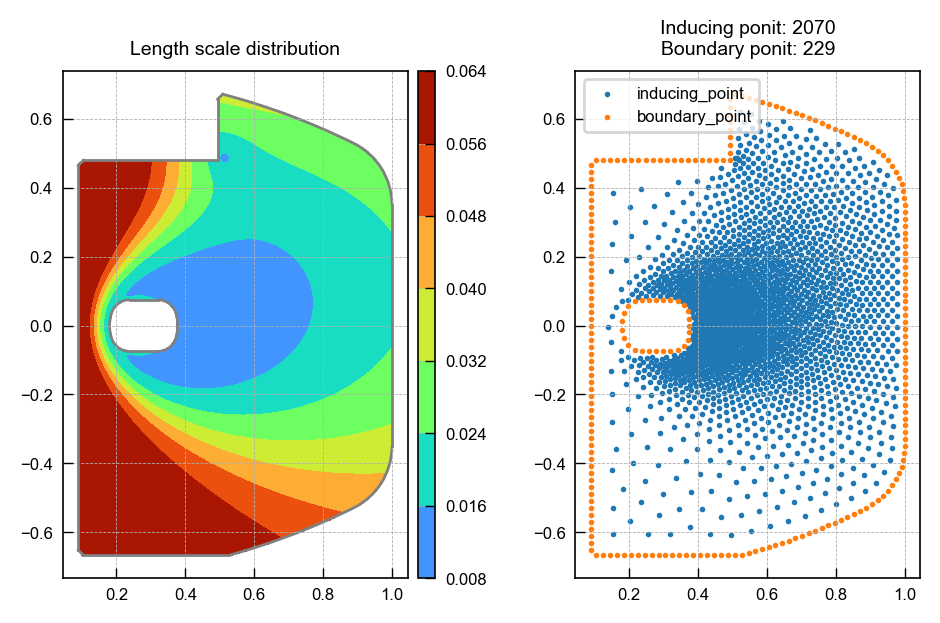

In [3]:
rt1kernel.load_point(**np.load('point_temp.npz'),length_sq_fuction=rt1.phantom.Length_scale_sq,is_plot=True)

In [5]:
raymodel= zray.Raytracing.load_setting('model.json')

FileNotFoundError: [Errno 2] No such file or directory: 'model.json'

In [99]:
r_plot = np.linspace(0.05,1.05,501)
z_plot = np.linspace(-0.7,0.7,501)
rt1kernel.set_grid_interface(r_plot,z_plot)

medium grid: 156 x 219


c:\Users\ueda\github_project\GPoidal\rt1\mag.py:112: RuntimeWarning: invalid value encountered in divide
  bz = a*(h*fe/ff + fk)
c:\Users\ueda\github_project\GPoidal\rt1\mag.py:113: RuntimeWarning: divide by zero encountered in divide
  br = e*(g*fe/ff - fk)
c:\Users\ueda\github_project\GPoidal\rt1\mag.py:113: RuntimeWarning: invalid value encountered in subtract
  br = e*(g*fe/ff - fk)
c:\Users\ueda\github_project\GPoidal\rt1\mag.py:211: RuntimeWarning: invalid value encountered in add
  5.048895851e0 \



fill_start_point is None, so use (0.5499999999999999, 3.2444873779000007e-17)

fill_start_point is None, so use (0.55, 5.672995894292217e-17)


In [100]:
func = rt1.phantom.get_phantom_funtion('double')

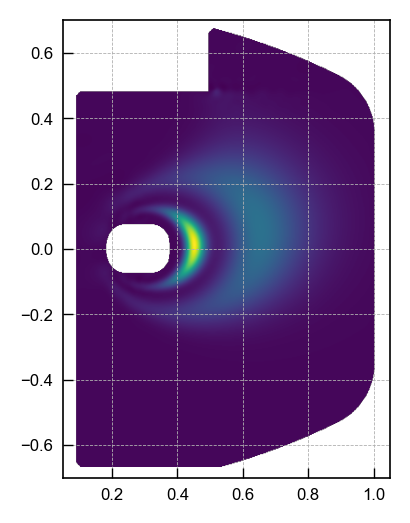

In [101]:
rI,zI = rt1kernel.r_idc,rt1kernel.z_idc

f_HD = rt1kernel.convert_grid(func(rI,zI))
im_mask = rt1kernel.mask
im_kwargs = rt1kernel.im_kwargs


plt.imshow(f_HD*im_mask,**im_kwargs)

In [102]:
raymodel.main(nreflections=2,pass_through_first=True)

focal_length: 0.01
location: [1.2 0.  0. ]
direction: [-0.92050485  0.39073113  0.        ]
sensor_size: [0.0082, 0.0082]
resolution: [200, 200]
rotation: 0
im_shape: (200, 200)
M: 40000


100%|██████████| 20/20 [00:07<00:00,  2.63it/s]


In [158]:
rt1kernel.set_kernel(length_scale_factor=1.4)
rt1kernel.sampler()

Eigenvalue decomposition is recalculated


array([ 0.22653557,  0.30276064, -0.05279003, ...,  0.20666283,
        0.24589296,  0.15839854])

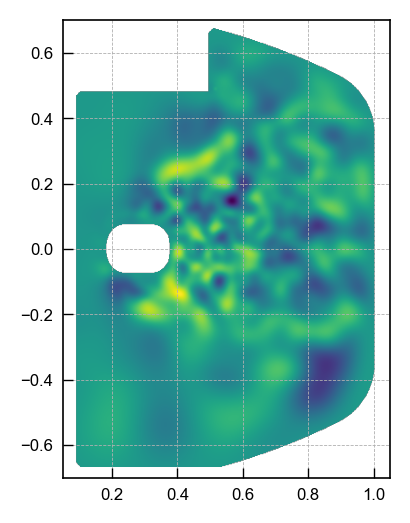

In [181]:
f = rt1kernel.sampler()
f_HD = rt1kernel.convert_grid(f)
plt.imshow(f_HD*im_mask,**im_kwargs)

In [ ]:
H2 = rt1kernel.create_obs_matrix_kernel_weighting(ray=raymodel.rays[1],Lnum=1001)

 60%|██████    | 24104/40000 [35:48<24:28, 10.83it/s]  

In [ ]:
H = rt1kernel.create_obs_matrix_kernel_interpolation(ray=raymodel.rays[1],Lnum=1001)

  0%|          | 23/10000 [00:02<21:37,  7.69it/s]


KeyboardInterrupt: 

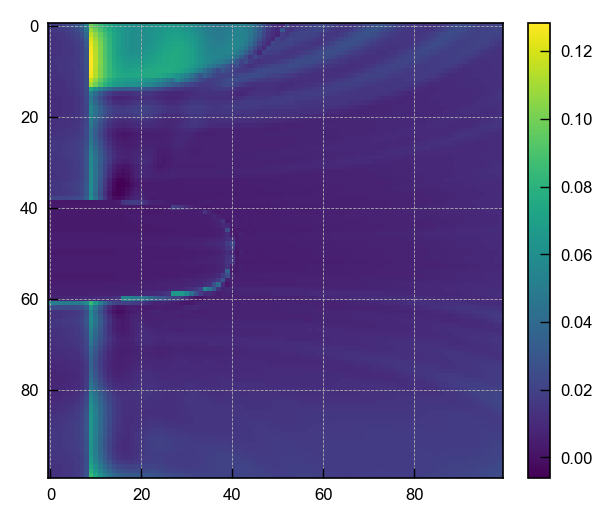

In [ ]:
plt.imshow(H2.sum(axis=1).reshape(200,200)- H.sum(axis=1).reshape(200,200))

plt.colorbar(  )

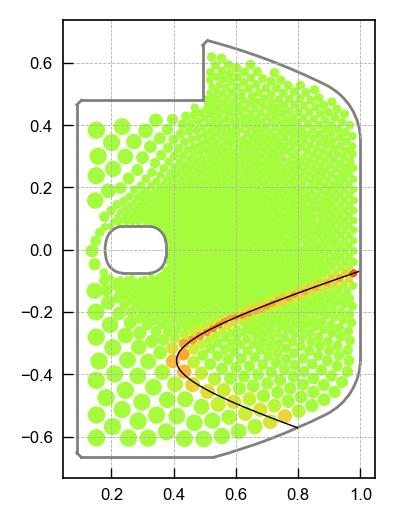

In [ ]:
i = np.random.randint(0,10000)

r_ray,z_ray = raymodel.rays[1].generate_rz(Lnum=100)
plt.plot(r_ray[i,:],z_ray[i,:],'k-',lw=0.5)
plt.scatter(rt1kernel.r_idc,rt1kernel.z_idc,s=rt1kernel.ls_sq_idc*1e4*0.7,c=H2[i,:]/rt1kernel.ls_sq_idc,cmap='turbo',vmin=-100,vmax=100)




rt1_vessel.plot()

plt.gca().set_aspect('equal')


In [188]:
A = np.linalg.svd(H)

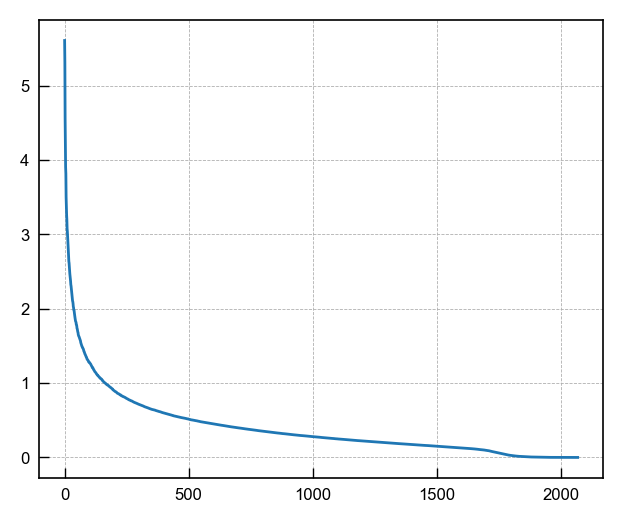

In [189]:
plt.plot(A.S)

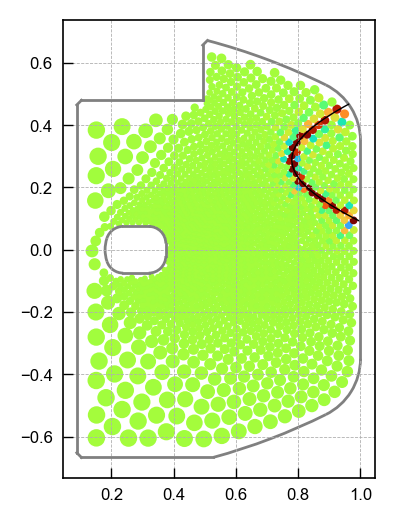

In [ ]:
i = np.random.randint(0,10000)

r_ray,z_ray = raymodel.rays[1].generate_rz(Lnum=100)
plt.plot(r_ray[i,:],z_ray[i,:],'k-',lw=0.5)
plt.scatter(rt1kernel.r_idc,rt1kernel.z_idc,s=rt1kernel.ls_sq_idc*1e4*0.7,c=H[i,:]/rt1kernel.ls_sq_idc,cmap='turbo',vmin=-100,vmax=100)




rt1_vessel.plot()

plt.gca().set_aspect('equal')


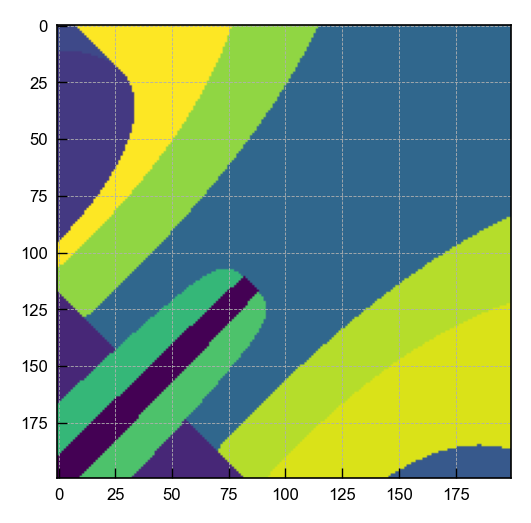

In [115]:
plt.imshow(raymodel.rays[1].curve_index.im)

In [ ]:
rt1kernel.create_obs_matrix(raymodel.rays[0],Lnum=100)

AttributeError: 'Ray' object has no attribute 'shape'

In [ ]:
rt1kernel.create_obs_matrix()

In [66]:
rt1_vessel.detect_grid(r_grid, z_grid)

NameError: name 'r_grid' is not defined

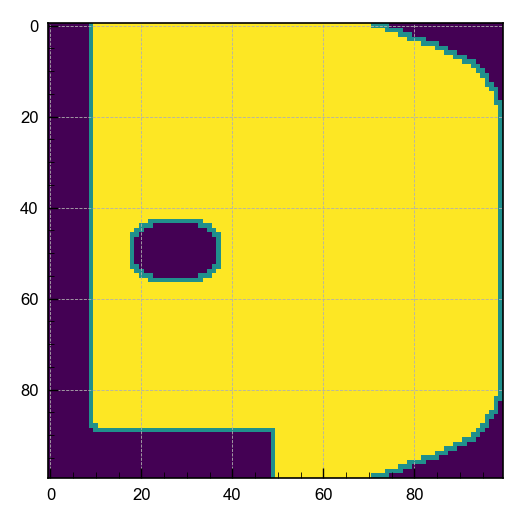

In [13]:
plt.imshow(rt1_vessel.fill)

In [14]:
print(rt1_vessel)

LineSegment(p0=(0.32, 0.075), p1=(0.2381534156157, 0.075))
LineSegment(p0=(0.375, -0.02), p1=(0.375, 0.02))
LineSegment(p0=(0.2381534156157, -0.075), p1=(0.32, -0.075))
LineSegment(p0=(0.0891, -0.6518687916845001), p1=(0.0891, 0.465))
LineSegment(p0=(0.1041, 0.48), p1=(0.493500000002, 0.48))
LineSegment(p0=(0.4935000000019, 0.48), p1=(0.4935000000019, 0.6568642520624001))
LineSegment(p0=(0.5269999999967, -0.6668687916845), p1=(0.103940112851, -0.6668687916845))
LineSegment(p0=(1.0000000000061, 0.3500015496597), p1=(1.0000000000061, -0.3500015496562))
LineSegment(p0=(0.4935000000019, 0.6568642520624001), p1=(0.5084705508735, 0.6718348029339001))
LineSegment(p0=(0.0891, 0.465), p1=(0.1041, 0.48))
LineSegment(p0=(0.0891, -0.6518687916845001), p1=(0.103940112851, -0.6668687916845))
CircularArc(center=(0.3, 0.0), radius=0.12, theta_start=162.0797868606, theta_end=197.9202131394)
CircularArc(center=(0.2381534156157, 0.02), radius=0.055, theta_start=90.0, theta_end=162.0797868606)
CircularArc

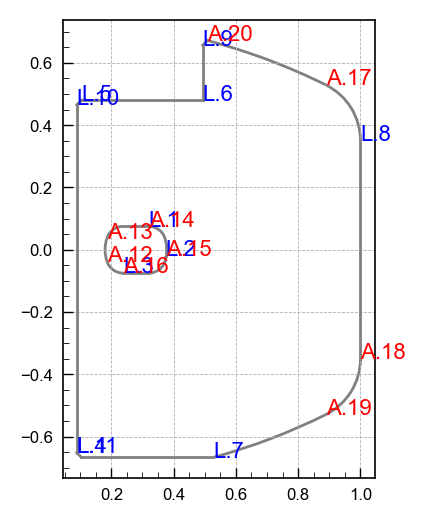

In [15]:
fig,ax = plt.subplots()
rt1_vessel.plot(label=True, ax=ax)
ax.set_aspect('equal')

In [16]:
camera = zray.measurement.Camera2D_xyz(
    location=(4, 0.0, 1.6),   # 例：x=150 の位置
    direction=(-1.0, 0., -.45),     # 中心軸は負の x 方向
    sensor_size=(0.036, 0.024),                 # センサーサイズ [mm]（例）
    resolution=(600, 400),                      # 解像度
    focal_length=0.06,                         # 焦点距離 [mm]（例）
    rotation= 0,                          # センサーの回転角度
)

focal_length: 0.06
location: [4.  0.  1.6]
direction: [-0.91192151  0.         -0.41036468]
sensor_size: (0.036, 0.024)
resolution: (600, 400)
rotation: 0
im_shape: (400, 600)
M: 240000


In [140]:
camera2 = zray.measurement.Camera2D_rphiz(
    focal_length=0.0063 ,                        # 焦点距離 [m]（例）
    location=(1.18, 0.0, 0),   # 例：x=150 の位置
    center_angles=(23.601,-1.6),
    sensor_size=( 0.004968,0.00373),                 # センサーサイズ [mm]（例）
    resolution=(600, 400),                      # 解像度
)

focal_length: 0.0063
sensor_size: (0.004968, 0.00373)
resolution: (600, 400)
location: [1.18 0.   0.  ]
center_angles: (23.601, -1.6)
rotation: 0
im_shape: (400, 600)
M: 240000


In [141]:
theta = np.arctan(0.45/1)

IF1  = zray.measurement.LineCamera(
    location=(1.01, 0, 0.0),   # 例：x=150 の位置
    direction=(-np.cos(theta), np.sin(theta), 0),     # 中心軸は負の x 方向
    sensor_size=(0.0),                 # センサーサイズ [mm]（例）
    resolution=1,                      # 解像度
    focal_length=0.06,                         # 焦点距離 [mm]（例）
)


IF2  = zray.measurement.LineCamera(
    location=(0.75, 0.0, 0.8),   # 例：x=150 の位置
    direction=(0.0, 0., -1),     # 中心軸は負の x 方向
    sensor_size=(0.0),                 # センサーサイズ [mm]（例）
    resolution=1,                      # 解像度
    focal_length=0.06,                         # 焦点距離 [mm]（例）
)


IF3  = zray.measurement.LineCamera(
    location=(0.6, 0.0, 0.8),   # 例：x=150 の位置
    direction=(0.0, 0., -1),     # 中心軸は負の x 方向
    sensor_size=(0),                 # センサーサイズ [mm]（例）
    resolution=1,                      # 解像度
    focal_length=0.06,                         # 焦点距離 [mm]（例）
)


focal_length: 0.06
location: [1.01 0.   0.  ]
direction: [-0.91192151  0.41036468  0.        ]
sensor_size: 0.0
resolution: 1
M: 1
focal_length: 0.06
location: [0.75 0.   0.8 ]
direction: [ 0.  0. -1.]
sensor_size: 0.0
resolution: 1
M: 1
focal_length: 0.06
location: [0.6 0.  0.8]
direction: [ 0.  0. -1.]
sensor_size: 0
resolution: 1
M: 1


In [82]:
IF1  = zray.measurement.LineCamera(
    location=(1.01, 0, 0.0),   # 例：x=150 の位置
    direction=(-np.cos(theta), np.sin(theta), 0),     # 中心軸は負の x 方向
    sensor_size=(0.0),                 # センサーサイズ [mm]（例）
    resolution=1,                      # 解像度
    focal_length=0.06,                         # 焦点距離 [mm]（例）
)

focal_length: 0.06
location: [1.01 0.   0.  ]
direction: [-0.91192151  0.41036468  0.        ]
sensor_size: 0.0
resolution: 1
M: 1


In [83]:
IF1.to_dict()

zray.measurement.LineCamera.from_dict(IF1.to_dict())

focal_length: 0.06
location: [1.01 0.   0.  ]
direction: [-0.91192151  0.41036468  0.        ]
sensor_size: 0.0
resolution: 1
M: 1


LineCamera(focal_length=0.06, location=array([1.01, 0.  , 0.  ]), direction=array([-0.91192151,  0.41036468,  0.        ]), sensor_size=0.0, resolution=1)

In [84]:
IFsum = zray.measurement.MultiCamera([IF1,IF2,IF3])

In [85]:
IFsum.camera_list[1]

LineCamera(focal_length=0.06, location=array([0.75, 0.  , 0.8 ]), direction=array([ 0.,  0., -1.]), sensor_size=0.0, resolution=1)

In [86]:
hoge = IFsum.to_dict()
hoge

{'classname': 'MultiCamera',
 'camera_list': [{'focal_length': 0.06,
   'location': [1.01, 0.0, 0.0],
   'direction': [-0.9119215051751064, 0.4103646773287979, 0.0],
   'sensor_size': 0.0,
   'resolution': 1,
   'classname': 'LineCamera'},
  {'focal_length': 0.06,
   'location': [0.75, 0.0, 0.8],
   'direction': [0.0, 0.0, -1.0],
   'sensor_size': 0.0,
   'resolution': 1,
   'classname': 'LineCamera'},
  {'focal_length': 0.06,
   'location': [0.6, 0.0, 0.8],
   'direction': [0.0, 0.0, -1.0],
   'sensor_size': 0,
   'resolution': 1,
   'classname': 'LineCamera'}]}

In [87]:
hoge = IFsum.to_dict()

zray.measurement.MultiCamera.from_dict(hoge)

focal_length: 0.06
location: [1.01 0.   0.  ]
direction: [-0.91192151  0.41036468  0.        ]
sensor_size: 0.0
resolution: 1
M: 1
focal_length: 0.06
location: [0.75 0.   0.8 ]
direction: [ 0.  0. -1.]
sensor_size: 0.0
resolution: 1
M: 1
focal_length: 0.06
location: [0.6 0.  0.8]
direction: [ 0.  0. -1.]
sensor_size: 0
resolution: 1
M: 1


In [88]:
hoge = IFsum.to_dict()
zray.measurement.MultiCamera.from_dict(hoge)

focal_length: 0.06
location: [1.01 0.   0.  ]
direction: [-0.91192151  0.41036468  0.        ]
sensor_size: 0.0
resolution: 1
M: 1
focal_length: 0.06
location: [0.75 0.   0.8 ]
direction: [ 0.  0. -1.]
sensor_size: 0.0
resolution: 1
M: 1
focal_length: 0.06
location: [0.6 0.  0.8]
direction: [ 0.  0. -1.]
sensor_size: 0
resolution: 1
M: 1


In [89]:
model = zray.main.Raytracing(rt1_vessel, IFsum)


In [90]:
model.measurement.to_dict()

{'classname': 'MultiCamera',
 'camera_list': [{'focal_length': 0.06,
   'location': [1.01, 0.0, 0.0],
   'direction': [-0.9119215051751064, 0.4103646773287979, 0.0],
   'sensor_size': 0.0,
   'resolution': 1,
   'classname': 'LineCamera'},
  {'focal_length': 0.06,
   'location': [0.75, 0.0, 0.8],
   'direction': [0.0, 0.0, -1.0],
   'sensor_size': 0.0,
   'resolution': 1,
   'classname': 'LineCamera'},
  {'focal_length': 0.06,
   'location': [0.6, 0.0, 0.8],
   'direction': [0.0, 0.0, -1.0],
   'sensor_size': 0,
   'resolution': 1,
   'classname': 'LineCamera'}]}

In [91]:
model.main(nreflections=1)

[ 0.  0. -1.]
[0.]
[[0.95528471 0.02462188 0.        ]]
[ 1. -0.  0.]
[0.]
[[0.75 0.   0.74]]
[ 1. -0.  0.]
[0.]
[[0.6  0.   0.74]]


100%|██████████| 20/20 [00:00<?, ?it/s]


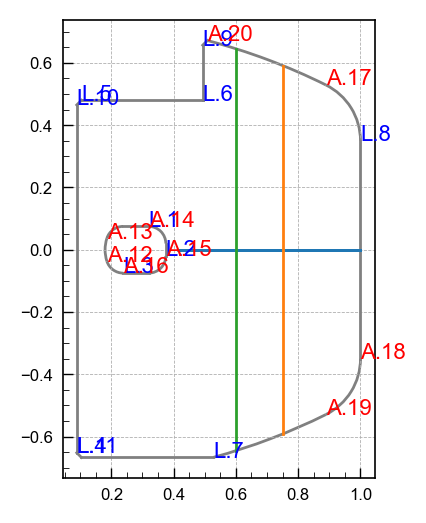

In [92]:
r,z = model.rays[1].generate_rz()
r.shape


fig,ax = plt.subplots()
rt1_vessel.plot(label=True, ax=ax)
cmap = plt.get_cmap("tab10")


for i in range(3):
    ax.plot(r[i,:],z[i,:],color=cmap(i),label=f'IF{i+1}')

ax.set_aspect('equal')

In [93]:
r_grid = np.linspace(0.1,1,250) 
z_grid = np.linspace(-0.7,0.7,250)

R,Z = np.meshgrid(r_grid,z_grid)

H = model.rays[1].generate_projectionmatrix_from_grid(r_grid,z_grid,Lnum=10001)



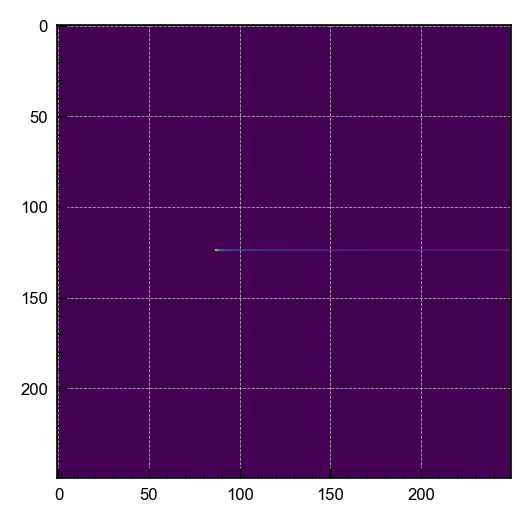

In [94]:
H2 = H.reshape(3,250,250)

plt.imshow(H2[0])

In [95]:
camera = zray.measurement.Camera2D_rphiz(
    focal_length=0.01 ,                        # 焦点距離 [m]（例）
    location=(1.2, 0.0, 0),   # 例：x=150 の位置
    center_angles=(23,0),
    sensor_size=( 0.0082,0.0082),                 # センサーサイズ [mm]（例）
    resolution=(200, 200),                      # 解像度
    rotation=-45/180*np.pi,                          # センサーの回転角度
)

focal_length: 0.01
sensor_size: (0.0082, 0.0082)
resolution: (200, 200)
location: [1.2 0.  0. ]
center_angles: (23, 0)
rotation: -0.7853981633974483
im_shape: (200, 200)
M: 40000


In [96]:
camera2 = zray.measurement.Camera2D_rphiz.from_dict(camera.to_dict())

focal_length: 0.01
sensor_size: (0.0082, 0.0082)
resolution: (200, 200)
location: [1.2 0.  0. ]
center_angles: (23, 0)
rotation: -0.7853981633974483
im_shape: (200, 200)
M: 40000


<Axes: >

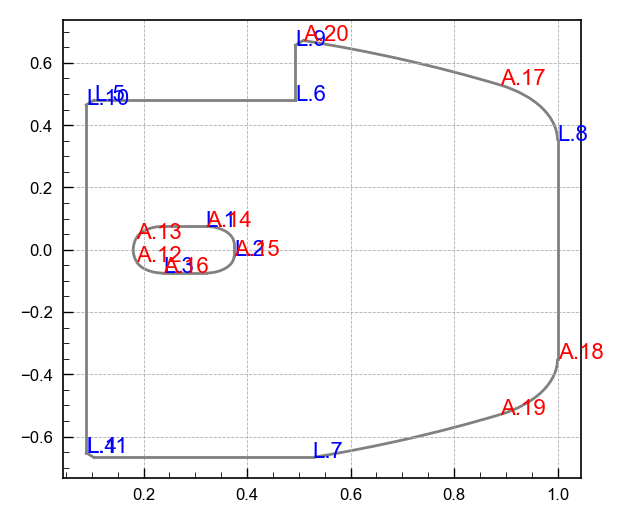

In [97]:
hoge = rt1_vessel.to_dict()


rt1_vessel2 = zray.AxisymmetricVessel.from_dict(hoge)

rt1_vessel2.plot(label=True)
    

In [98]:
model = zray.main.Raytracing(rt1_vessel, camera)

In [99]:
model.save_setting('model.json')

In [100]:
model = zray.main.Raytracing.load_setting('model.json')

focal_length: 0.01
sensor_size: [0.0082, 0.0082]
resolution: [200, 200]
location: [1.2 0.  0. ]
center_angles: [23, 0]
rotation: -0.7853981633974483
im_shape: (200, 200)
M: 40000


In [101]:
model.main(nreflections=3)

focal_length: 0.01
location: [1.2 0.  0. ]
direction: [-0.92050485  0.39073113  0.        ]
sensor_size: [0.0082, 0.0082]
resolution: [200, 200]
rotation: -0.7853981633974483
im_shape: (200, 200)
M: 40000


100%|██████████| 20/20 [00:06<00:00,  3.05it/s]


inf length is detected 2


100%|██████████| 20/20 [00:06<00:00,  3.03it/s]


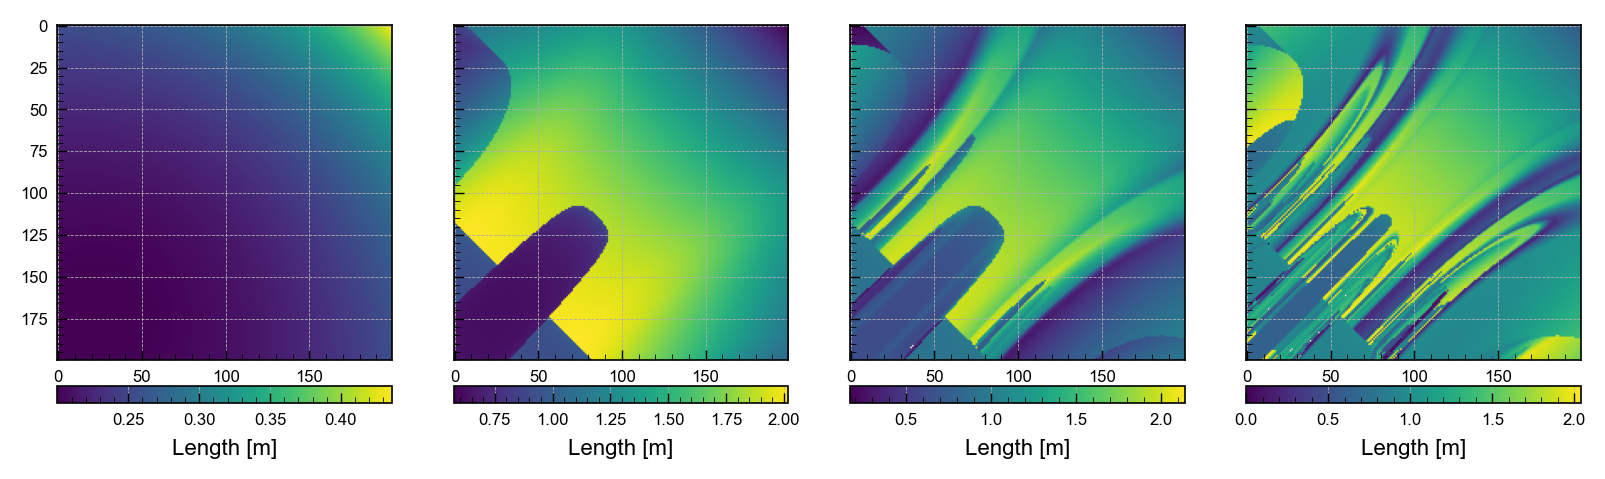

In [102]:
model.plot()

In [103]:
model.save_setting('hoge')

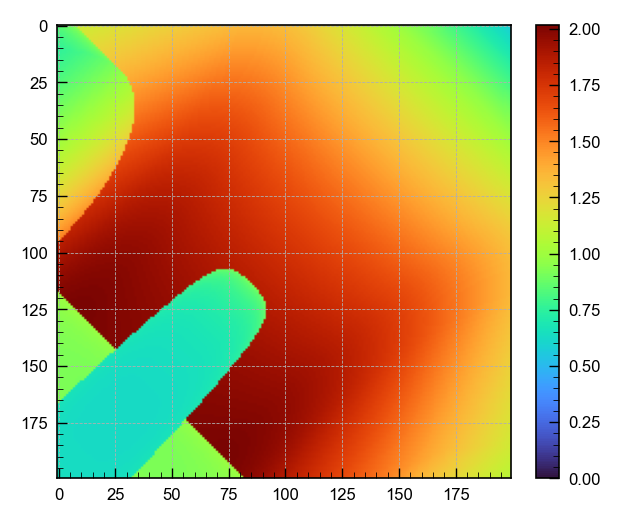

In [104]:
A = model.rays[1].Length 
A = np.nan_to_num(A)
plt.imshow(A.reshape(200,200),cmap='turbo',vmin=0)
plt.colorbar()

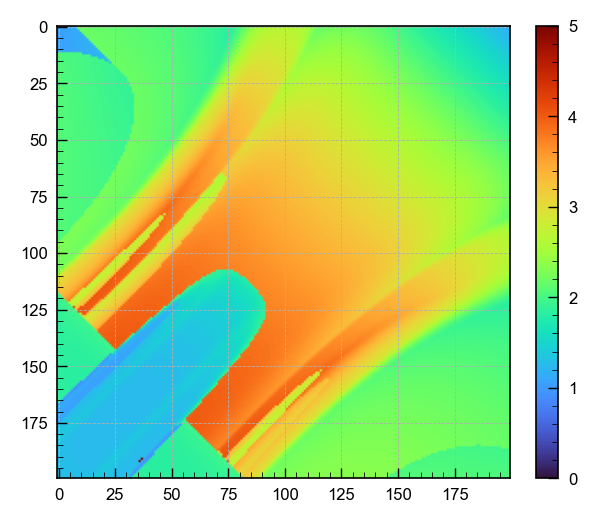

In [105]:
A = model.rays[1].Length + model.rays[2].Length*1 # + model.rays[3].Length*0.5 #+  model.rays[4].Length*0.1

A = np.nan_to_num(A)
plt.imshow(A.reshape(200,200),cmap='turbo',vmin=0,vmax=5)
plt.colorbar()

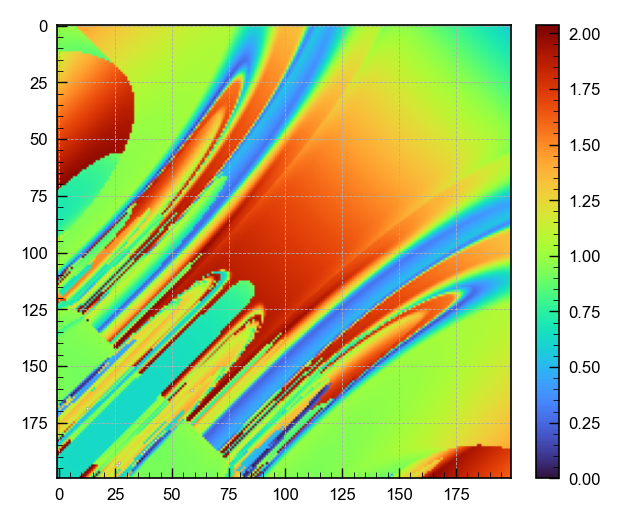

In [106]:

plt.imshow(model.rays[3].Length.reshape(200,200),cmap='turbo')
plt.colorbar()

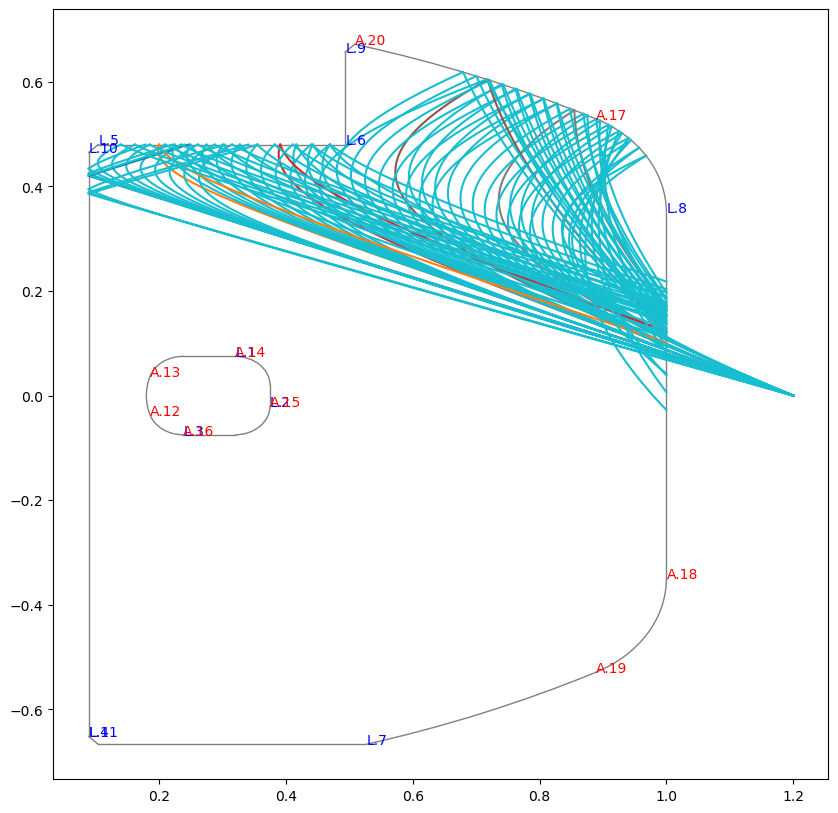

In [ ]:

fig,ax = plt.subplots(figsize=(10,10))
rt1_vessel.plot(label=True, ax=ax)
cmap = plt.get_cmap("tab10")

r,z= model.rays[0].generate_rz()
for i in range(0,2400,41):
    plt.plot(r[i,:],z[i,:] ,color=cmap(i//21))
r,z= model.rays[1].generate_rz()


for i in range(0,2400,41):
    plt.plot(r[i,:],z[i,:] ,color=cmap(i//21))

r,z= model.rays[2].generate_rz()

for i in range(0,2400,41):
    plt.plot(r[i,:],z[i,:],color=cmap(i//21))



In [30]:
model.rays[1].Length + model.rays[2].Length 


ImageVector([1.14457952, 1.14282988, 1.14109221, ..., 2.02323169,
             2.02488238, 2.02554268])

In [31]:
plt.figure(figsize=(15,10))

A = model.rays[1].Length + model.rays[2].Length*1 + + model.rays[3].Length*1

A = np.nan_to_num(A)
plt.imshow(A.reshape(40,60),cmap='turbo',vmin=0,vmax=5)
plt.colorbar()

ValueError: cannot reshape array of size 40000 into shape (40,60)

<Figure size 1500x1000 with 0 Axes>

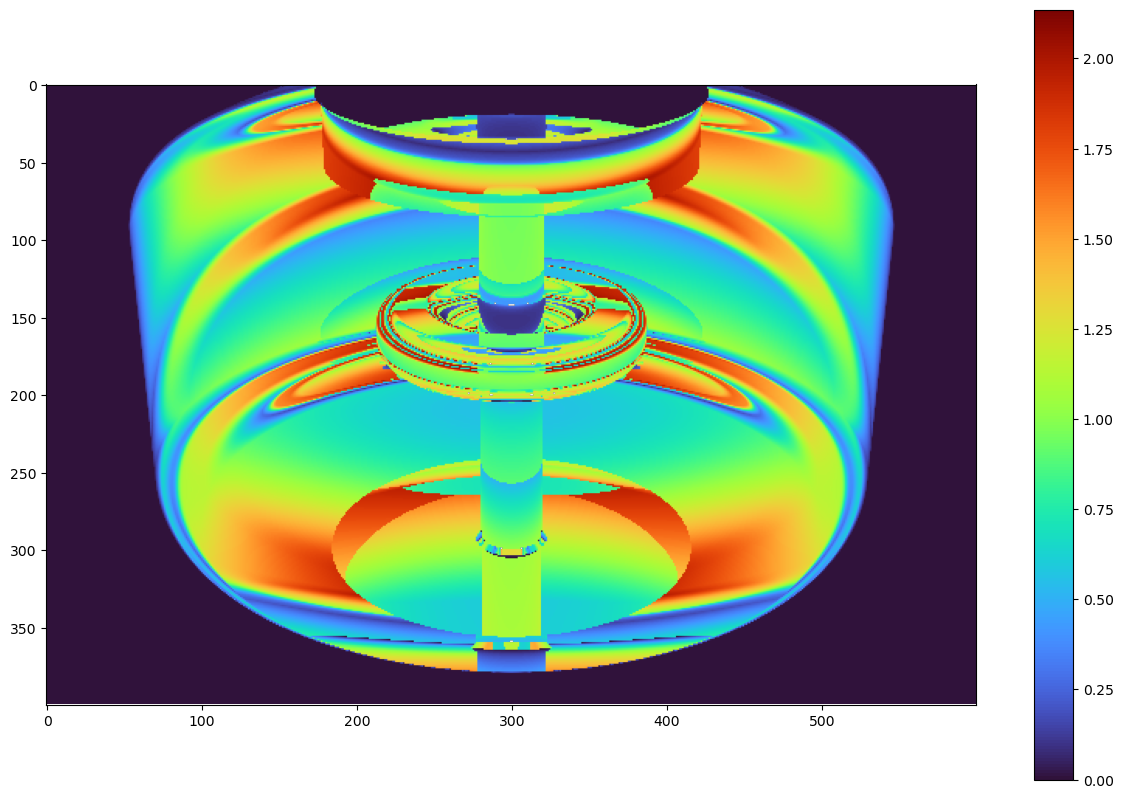

In [ ]:
plt.figure(figsize=(15,10))

plt.imshow(model.rays[3].Length.reshape(200,200),cmap='turbo')
plt.colorbar()

c:\Users\uedak\anaconda3\Lib\site-packages\matplotlib\colors.py:777: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


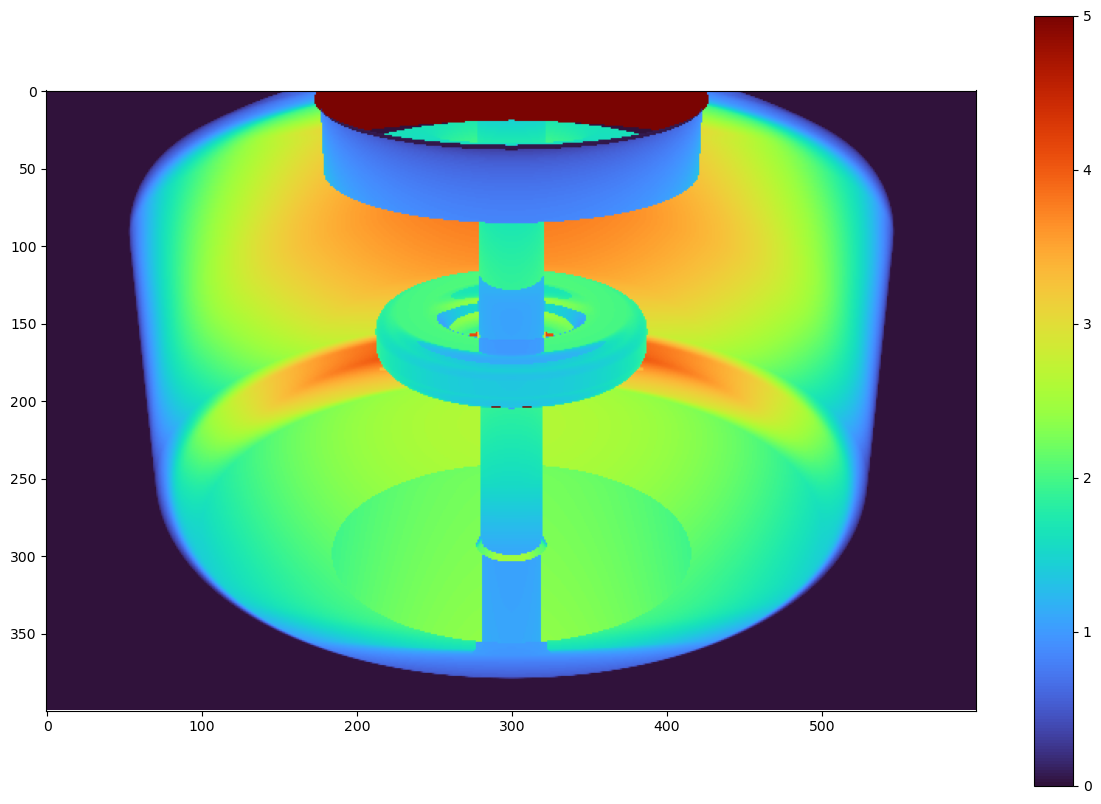

In [ ]:
plt.figure(figsize=(15,10))

A = model.rays[1].Length + model.rays[2].Length*1 # + model.rays[3].Length*0.5 #+  model.rays[4].Length*0.1

A = np.nan_to_num(A)
plt.imshow(A.reshape(400,600),cmap='turbo',vmin=0,vmax=5)
plt.colorbar()

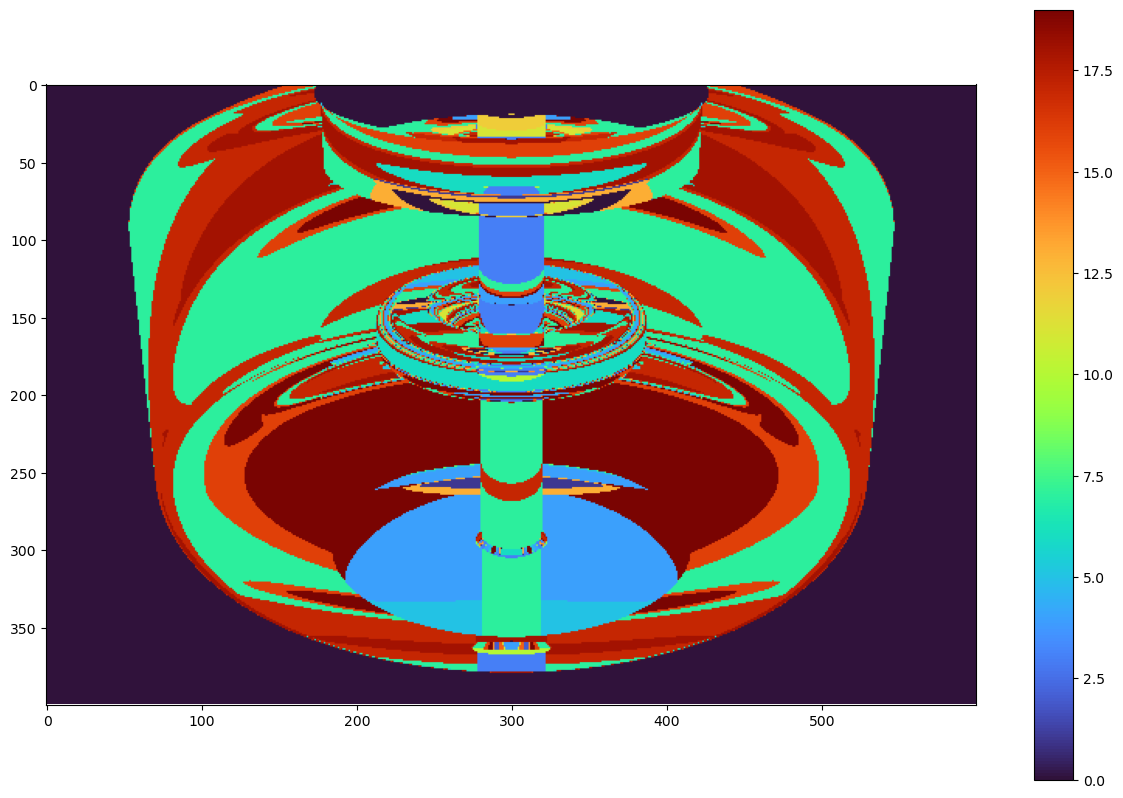

In [389]:
plt.figure(figsize=(15,10))
plt.imshow(model.rays[3].curve_index.reshape(400,600),cmap='turbo')
plt.colorbar()


In [25]:
camera2 = zray.Camera_rphiz(
    focal_length=0.0063 ,                        # 焦点距離 [m]（例）
    location=(1.18, 0.0, 0),   # 例：x=150 の位置
    center_angles=(23.601,-1.6),
    sensor_size=( 0.004968,0.00373),                 # センサーサイズ [mm]（例）
    resolution=(600, 400),                      # 解像度
    rotation= 45/180*np.pi,                          # センサーの回転角度
)

focal_length: 0.0063
sensor_size: (0.004968, 0.00373)
resolution: (600, 400)
location: [1.18 0.   0.  ]
center_angles: (23.601, -1.6)
rotation: 0.7853981633974483
im_shape: (400, 600)
M: 240000


In [ ]:
model = zray.Raytracing(rt1_vessel, camera2)



In [27]:
model.main(nreflections=4)

focal_length: 0.0063
location: [1.18 0.   0.  ]
direction: [-0.91599847  0.40020893 -0.02792164]
sensor_size: (0.004968, 0.00373)
resolution: (600, 400)
rotation: 0.7853981633974483
im_shape: (400, 600)
M: 240000


100%|██████████| 20/20 [00:39<00:00,  1.98s/it]


inf length is detected 32


100%|██████████| 20/20 [00:39<00:00,  1.97s/it]


inf length is detected 84


100%|██████████| 20/20 [00:38<00:00,  1.91s/it]


In [28]:
model.rays[0].Length.im


ImageVector([[0.1808828 , 0.18086332, 0.18084406, ..., 0.22807145,
              0.2282811 , 0.2284913 ],
             [0.18089085, 0.18087136, 0.1808521 , ..., 0.22813435,
              0.22834427, 0.22855475],
             [0.18089924, 0.18087974, 0.18086046, ..., 0.22819779,
              0.22840798, 0.22861873],
             ...,
             [0.21750822, 0.21751407, 0.21752024, ..., 0.32345973,
              0.32395363, 0.32444968],
             [0.21770542, 0.21771145, 0.21771779, ..., 0.32400821,
              0.3245041 , 0.32500216],
             [0.21790325, 0.21790946, 0.21791598, ..., 0.32455958,
              0.32505748, 0.32555757]])

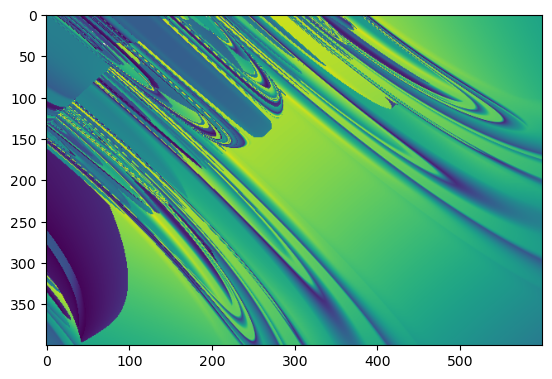

In [29]:
plt.imshow(model.rays[4].Length.im)

In [ ]:
T = zray.core.intersect_rays_line(rt1_vessel.Lines[5],O,D)    
plt.imshow(T.reshape(200,300),cmap='jet')

AttributeError: 'CylindalContainer' object has no attribute 'Lines'

In [227]:
%timeit zray.core.intersect_rays_arc(conatiner.Arcs[7],O,D)

1.06 s ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


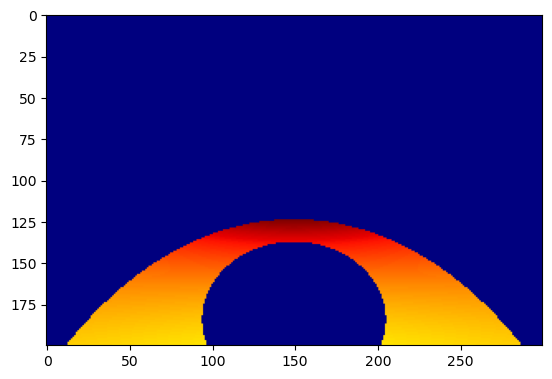

In [ ]:
T= zray.core.intersect_rays_arc(rt1_vessel.Arcs[7],O,D)
plt.imshow(T.reshape(200,300),cmap='jet')